# Study day 1

### Data load & setting

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import mglearn

In [14]:
#붓꽃 품종 분류 데이터 load
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [15]:
#fearture 이름 확인
print("iris_data_set_feature_name: \n{}".format(iris_dataset['feature_names']))

iris_data_set_feature_name: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
#label 이름 확인
print("iris_data_set_target_name: \n{}".format(iris_dataset['target_names']))

iris_data_set_target_name: 
['setosa' 'versicolor' 'virginica']


In [17]:
#데이터 크기 확인
print("iris_data_set_size: \n{}".format(iris_dataset['data'].shape))

iris_data_set_size: 
(150, 4)


In [18]:
#head 5 줄 확인
print("iris_data_set_head5: \n{}".format(iris_dataset['data'][:5]))

iris_data_set_head5: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
#label 데이터 타입 확인
print("iris_data_set_type \n{}".format(type(iris_dataset['target'])))

iris_data_set_type 
<class 'numpy.ndarray'>


In [20]:
#test set, training set 나누기
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], test_size=0.3, random_state=0)

In [21]:
#나눠진 데이터 셋 확인
print("x_train_size: \n{}".format(X_train.shape))
print("y_train_size: \n{}".format(y_train.shape))

print("x_test_size: \n{}".format(X_test.shape))
print("y_test_size: \n{}".format(y_test.shape))

x_train_size: 
(105, 4)
y_train_size: 
(105,)
x_test_size: 
(45, 4)
y_test_size: 
(45,)


### EDA

In [22]:
#X_train으로 dataframe 만들기
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c21a01b10>,
      dtype=object)

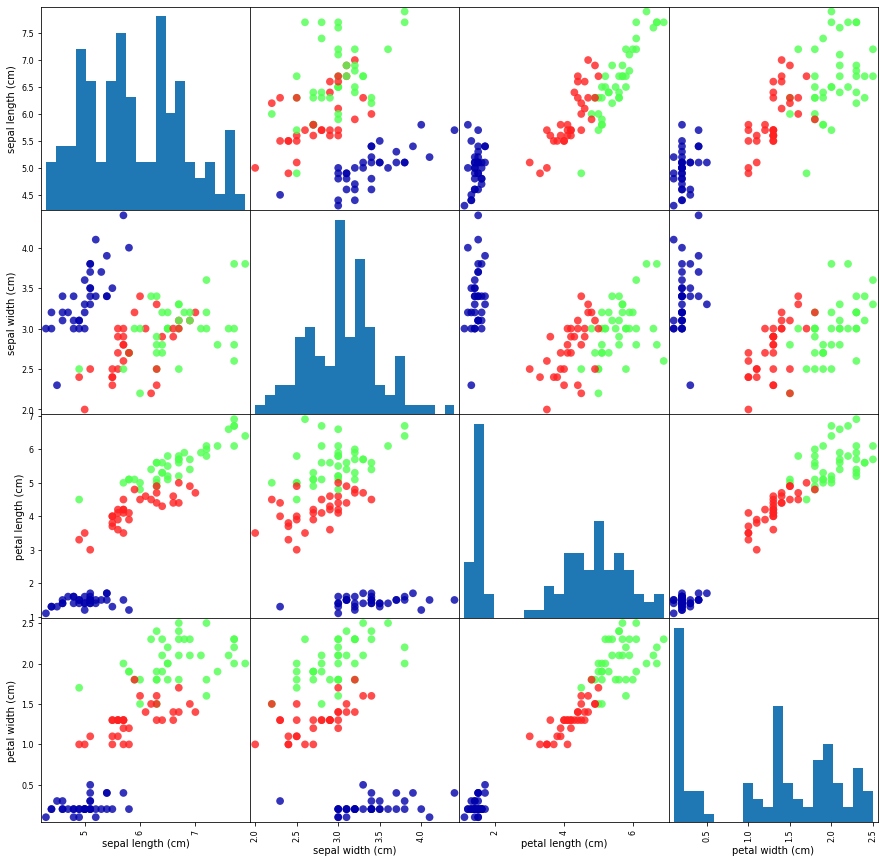

In [23]:
#xtrain 데이터의 ytrain별 색을 다르게 한 동그란 산점도 행렬 만들기
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize =(15,15), marker ='o', hist_kwds={'bins':20}, s=60, alpha=0.8, cmap=mglearn.cm3)

# Study day 2

### KNN

In [24]:
#KNN 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [25]:
#K=1
knn=KNeighborsClassifier(n_neighbors=1)

In [26]:
#모델 피팅
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
#예측할 샘플만들기
X_new = np.array([[5,2.9,1,0.2]])

In [28]:
#prediction
knn_pred = knn.predict(X_new)
print(iris_dataset['target_names'][knn_pred])

['setosa']


In [29]:
#evaluation
y_pred=knn.predict(X_test)
print("pred_lables: \n{}".format(iris_dataset['target_names'][y_pred]))
print("pred_accuracy: \n{}".format(np.mean(y_pred == y_test)))

pred_lables: 
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa']
pred_accuracy: 
0.9777777777777777


### Supervised learning

#### Data load

In [30]:
#맷플롯립 임포트
import matplotlib.pyplot as plt

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'second feature')

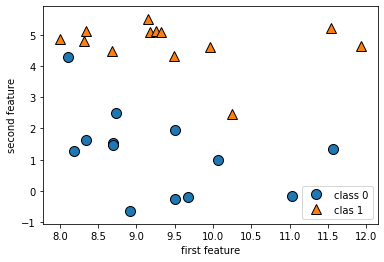

In [31]:
#data set 만들기
X, y = mglearn.datasets.make_forge()
#scatter plot
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "clas 1"], loc =4)
plt.xlabel("first feature")
plt.ylabel("second feature")

Text(0, 0.5, 'target')

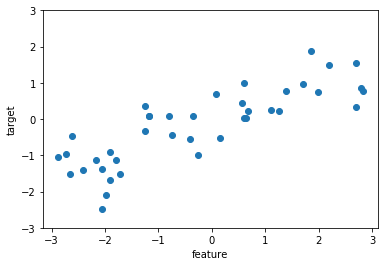

In [32]:
#data set 만들기 2
X, y = mglearn.datasets.make_wave(n_samples =40)
plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

In [33]:
# data set 가져오기 1
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#클래스별 샘플 수 보기
print("the number of sample by class: \n{}".format({n: v for n , v in zip(cancer.target_names, np.bincount(cancer.target))}))

the number of sample by class: 
{'malignant': 212, 'benign': 357}


In [34]:
# data set 가져오기 2
from sklearn.datasets import load_boston
boston=load_boston()
X, y =mglearn.datasets.load_extended_boston()

#### KNN

In [35]:
from sklearn.datasets.samples_generator import make_blobs

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


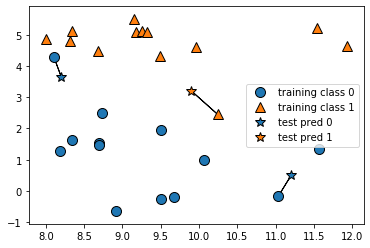

In [36]:
#knn 으로 예측하기 (k=1)
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


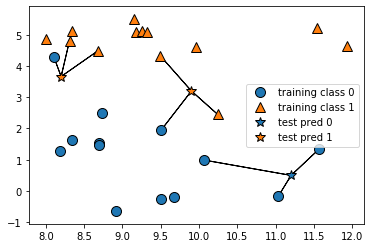

In [37]:
#knn 으로 예측하기 (k=3)
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [38]:
#test training set 나누기
X, y =mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [39]:
#classification
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [40]:
#prediction & evaluation
print("pred_lables: \n{}".format(clf.predict(X_test)))
print("pred_accuracy: \n{}".format(clf.score(X_test, y_test)))

pred_lables: 
[1 0 1 0 1 0 0]
pred_accuracy: 
0.8571428571428571


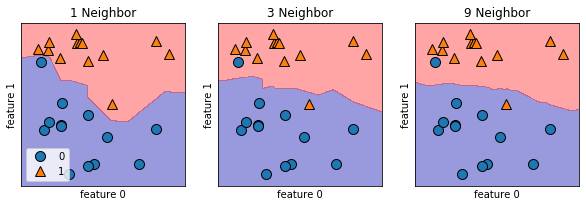

In [41]:
#K가 1, 3, 9 일때 차트로 그려서 classification 시각화
fig, axes = plt.subplots(1,3, figsize =(10,3))

for n_neighbors, ax in zip ([1,3,9], axes): 
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} Neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

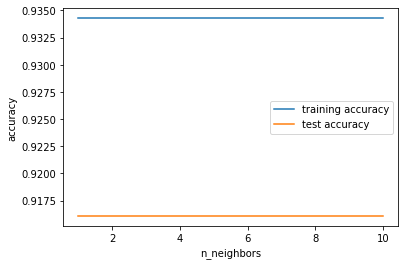

In [42]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11) #1~10 K 적용

for n_neghbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()

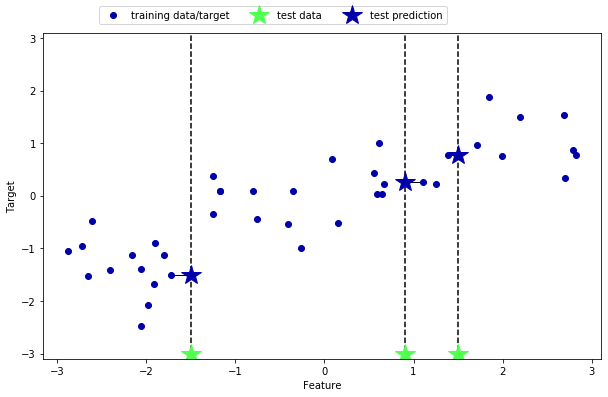

In [43]:
#knn regression
mglearn.plots.plot_knn_regression(n_neighbors=1)

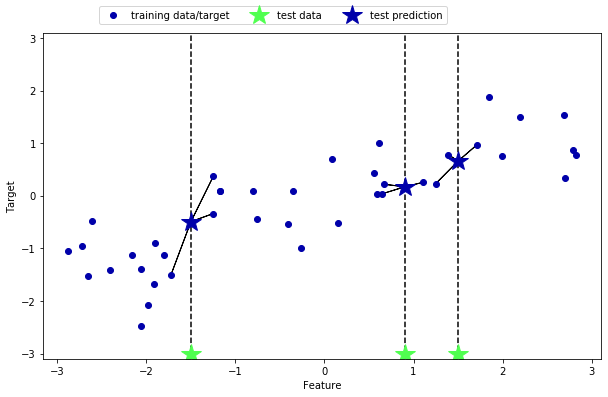

In [44]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
#wave data set
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [46]:
print("prediction: \n{}".format(reg.predict(X_test)))
print("test set r square: {:.2f}".format(reg.score(X_test, y_test)))

prediction: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
test set r square: 0.83


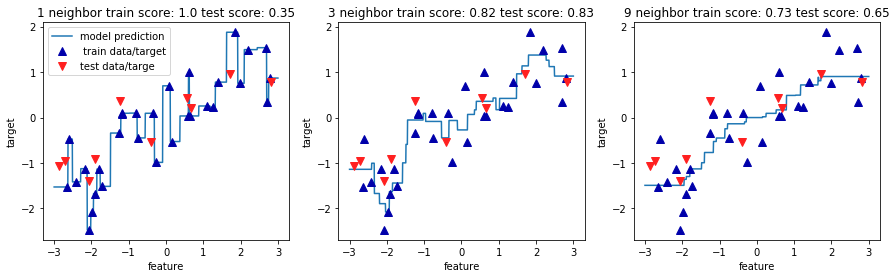

In [47]:
fig, axes = plt.subplots(1, 3, figsize = (15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        ax.plot(line, reg.predict(line))
        ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize =8)
        ax.plot(X_test, y_test, 'v' , c=mglearn.cm2(1), markersize =8)
        
        ax.set_title(
            "{} neighbor train score: {:.2} test score: {:.2}".format(
                n_neighbors, reg.score(X_train, y_train),
                reg.score(X_test, y_test)))
        ax.set_xlabel("feature")
        ax.set_ylabel("target")
axes[0].legend(["model prediction"," train data/target","test data/targe"], loc="best") 
#K가 많을 수록 더 안정적 예측 기대 가능

#### Linear regression

w[0]: 0.393906  b: -0.031804


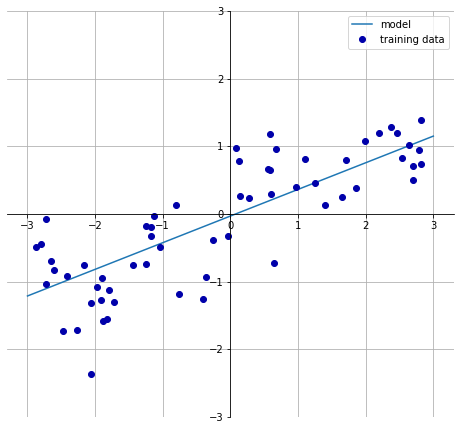

In [48]:
#linear model
mglearn.plots.plot_linear_regression_wave()

In [49]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

lr=LinearRegression().fit(X_train,y_train)
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test))) #training set 과  test set score가 매우 비슷한 것은 과소적합 상태일 수 있음

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746
train set score: 0.67
test set score: 0.66


In [50]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test))) #training set이 월등히 높은 경우 과대 적합 생태

train set score: 0.95
test set score: 0.61


#### Ridge regression 

In [51]:
from sklearn.linear_model import Ridge #릿지도 선형 모델, L2 규제 노름제곱 페널티 적용

ridge = Ridge().fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

train set score: 0.89
test set score: 0.75


In [52]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test, y_test))) #alpha값을 높이면 계수를 0에 가깝게 하여 일반화에 도움이 된다

train set score: 0.79
test set score: 0.64


In [53]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test, y_test))) #alpha값을 높이면 계수를 0에 가깝게 하여 일반화에 도움이 된다

train set score: 0.93
test set score: 0.77


/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backend

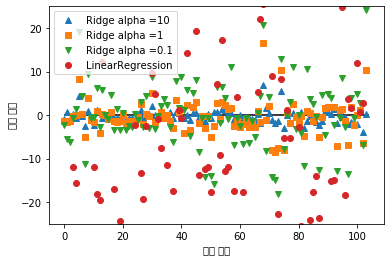

In [54]:
#alpha 값에 따라 codfficient가 어떻게 달라지는지 시각화 (알파가 클 수록 코이피션트의 절댓값의 크기가 작아진다)
plt.plot(ridge10.coef_, '^', label ="Ridge alpha =10")
plt.plot(ridge.coef_, 's', label ="Ridge alpha =1")
plt.plot(ridge01.coef_, 'v', label ="Ridge alpha =0.1")

plt.plot(lr.coef_, 'o', label ="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

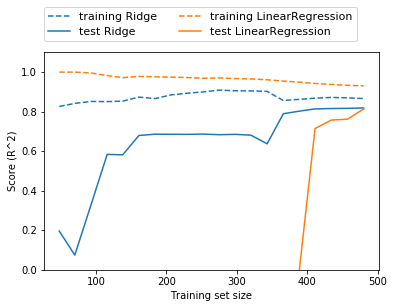

In [55]:
#Learning curve: data set 크기에 따른 모델 성능 변화를 나타낸 그래프 
mglearn.plots.plot_ridge_n_samples()
#traing set score는 Linear가 어떤 data set 크기여도 더 높음 하지만 test set score는 ridge가 더 높음

#### Lasso

In [57]:
# linear 중 ridge 대안인 lasso, ridge와 마찬가지로  계수를 0에 가깝게 만든다. L1 규제로 완전히 0이 되는 계수도 생김 이러면 완전히 제외되는 특성이 됨->모델 이해가 쉬워짐
#보통은 릿지를 선호하나 많은 계수 중 추려내야 할때 라소를 씀
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("number of features: {:.2f}".format(np.sum(lasso.coef_ != 0)))#영향력 0이 아닌, 104개 중 4개

training set score: 0.29
test set score: 0.21
number of features: 4.00


In [60]:
#Lasso 계수를 0으로 얼마나 강하게 보낼지 조정하는 alpha  매개 변수 (릿지와 마찬가지) 조정
lasso001 = Lasso(alpha = 0.01, max_iter =100000).fit(X_train, y_train) # max_iter 적으면 늘리라고 경고가 나온다
print("training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("number of features: {:.2f}".format(np.sum(lasso001.coef_ != 0)))#영향력 0이 아닌, 104개 중 4개

training set score: 0.90
test set score: 0.77
number of features: 33.00


In [61]:
#Lasso 계수를 0으로 얼마나 강하게 보낼지 조정하는 alpha  매개 변수 (릿지와 마찬가지) 조정
lasso00001 = Lasso(alpha = 0.0001, max_iter =100000).fit(X_train, y_train) # max_iter 적으면 늘리라고 경고가 나온다
print("training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("number of features: {:.2f}".format(np.sum(lasso00001.coef_ != 0)))#영향력 0이 아닌, 104개 중 4개

training set score: 0.95
test set score: 0.64
number of features: 96.00


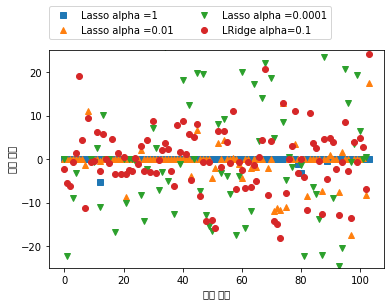

In [63]:
#alpha 값에 따라 codfficient가 어떻게 달라지는지 시각화 (알파가 클 수록 코이피션트의 절댓값의 크기가 작아진다)
plt.plot(lasso.coef_, 's', label ="Lasso alpha =1")
plt.plot(lasso001.coef_, '^', label ="Lasso alpha =0.01")
plt.plot(lasso00001.coef_, 'v', label ="Lasso alpha =0.0001")

plt.plot(ridge01.coef_, 'o', label ="LRidge alpha=0.1")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0,1.05))

#### Logistic regression

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


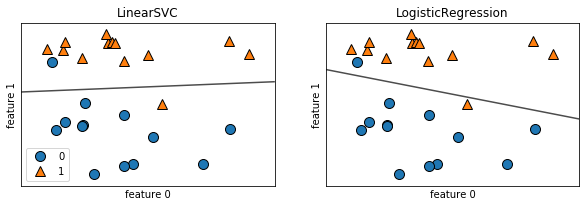

In [69]:
#Logistic regression -분류
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, 
                                   ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

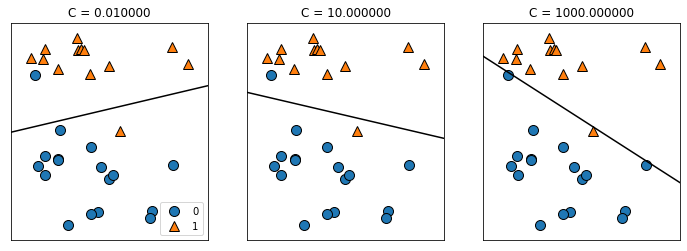

In [70]:
#규제 강도 매개변수 C, C값이 높아지면 규제가 감소하며 훈련세트에 최대한 맞추게 된다(오버피팅), C값이 낮아지면 계수벡터(w)가 0에 가까워진다
mglearn.plots.plot_linear_svc_regularization()

In [72]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print("training set score:{:.3f}".format(logreg.score(X_train,y_train)))

training set score:0.946


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
